In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, evaluate, models, train, plot
from torchsummary import summary
from torchvision.models import googlenet, GoogLeNet_Weights
import torch.nn as nn

# Parameter Initialization

In [2]:
data_path = 'data/asl_alphabet_train'
samples = 12000
split_factor = [0.7, 0.15, 0.15]
batch_size = 128
lr = 5e-4
epochs = 7
image_size = (100, 100)
l2_reg = 1e-4

# Get Train, Val and Test Split

In [3]:
torch.manual_seed(0)
trans = T.Compose([T.ToTensor(), T.Resize(image_size), T.Normalize((0.5190, 0.4992, 0.5140), (0.2244, 0.2523, 0.2616))])
dataset = torchvision.datasets.ImageFolder(root=data_path, transform=trans)
train_loader, valid_loader, test_loader = data.split_dataset(dataset, samples, split_factor, batch_size)

# Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

model = torchvision.models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
model = model.to(device)
summary(model, input_size=(3, image_size[0], image_size[1]))

Using cuda device
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           9,408
       BatchNorm2d-2           [-1, 64, 50, 50]             128
       BasicConv2d-3           [-1, 64, 50, 50]               0
         MaxPool2d-4           [-1, 64, 25, 25]               0
            Conv2d-5           [-1, 64, 25, 25]           4,096
       BatchNorm2d-6           [-1, 64, 25, 25]             128
       BasicConv2d-7           [-1, 64, 25, 25]               0
            Conv2d-8          [-1, 192, 25, 25]         110,592
       BatchNorm2d-9          [-1, 192, 25, 25]             384
      BasicConv2d-10          [-1, 192, 25, 25]               0
        MaxPool2d-11          [-1, 192, 12, 12]               0
           Conv2d-12           [-1, 64, 12, 12]          12,288
      BatchNorm2d-13           [-1, 64, 12, 12]             128
      BasicConv2d-14 

## 1) Training Phase

In [5]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = train.train_model(model, train_loader, valid_loader, lr,
                                                                                           epochs, device, l2_reg)

Epoch 1 -> Loss = 0.0321 | Train Accuracy = 99.14% | valation Accuracy = 98.39%
Epoch 2 -> Loss = 0.0167 | Train Accuracy = 99.58% | valation Accuracy = 98.94%
Epoch 3 -> Loss = 0.0093 | Train Accuracy = 99.76% | valation Accuracy = 98.89%
Epoch 4 -> Loss = 0.0119 | Train Accuracy = 99.68% | valation Accuracy = 98.72%
Epoch 5 -> Loss = 0.0315 | Train Accuracy = 99.04% | valation Accuracy = 98.33%
Epoch 6 -> Loss = 0.0209 | Train Accuracy = 99.64% | valation Accuracy = 98.89%
Epoch 7 -> Loss = 0.0287 | Train Accuracy = 99.31% | valation Accuracy = 98.44%
----------------------------------------------------------------------------------------------------
Time taken to train: 289.23s
Average time of each epoch: 41.32s


### Plots

Final Train Accuracy = 99.31%
Final Validation Accuracy  = 98.44%


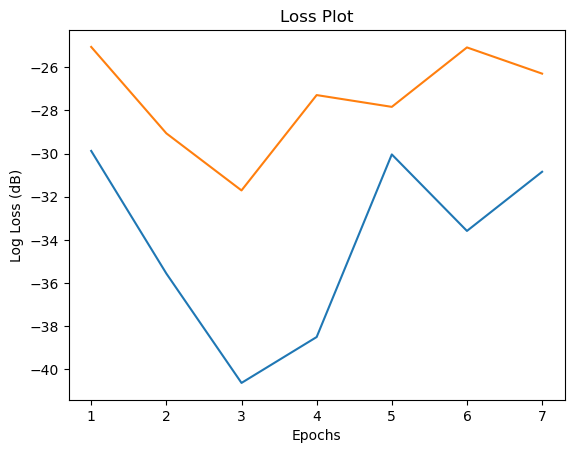

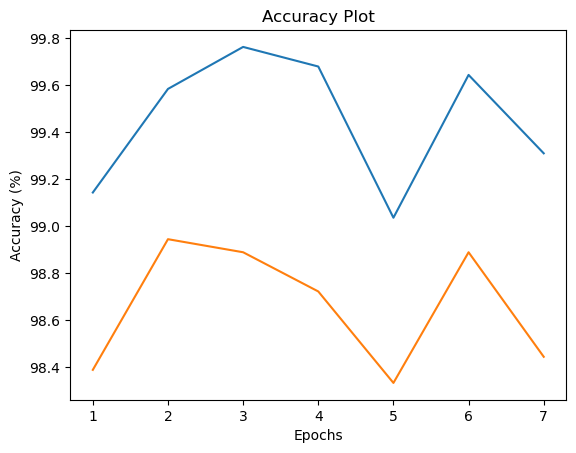

In [6]:
plot.plot_metrics(train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list)

## 2) Testing Phase

### i) Test Accuracy

In [7]:
test_accuracy, y_true, y_pred = evaluate.evaluate_model(model, test_loader, device)

Test Accuracy = 98.4444%
F1 Score = 0.9843
Recall = 0.9844
Precision = 0.9854


### ii) Confusion Matrix

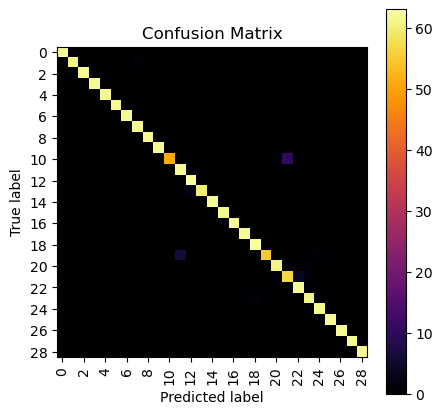

In [8]:
evaluate.conf_matrix(dataset, y_true, y_pred)